Vehicle dataset analysis

In this project we will be filtering through a vehicle dataset to determine a number of factors including cost, color and condition to name a few. The first steps of the project will focus on cleaning the dataset with the end of the project being focused on graphic visualizations. 

In [100]:
import pandas as pd
import streamlit as st
import plotly.express as px


In [101]:
df = pd.read_csv('vehicles_us.csv')

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [103]:
df.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


In [104]:
#checking for duplicates
df.duplicated().sum()

0

In [105]:
# Fill missing values based on median for each model
df['model_year'] = df['model_year'].fillna(df.groupby(['model'])['model_year'].transform('median'))

# Fill missing odometer values based on median for each model
df['odometer'] = df['odometer'].fillna(df.groupby(['model'])['odometer'].transform('median'))

# Fill missing cylinders values based on median for each model
df['cylinders'] = df['cylinders'].fillna(df.groupby(['model'])['cylinders'].transform('median'))


In [106]:
#checking for missing values
df.isna().sum()

price               0
model_year          0
model               0
condition           0
cylinders           0
fuel                0
odometer           41
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

In [107]:
#correcting missing data for is_4wd
df['is_4wd'].fillna("0", inplace=True)
#fixing missing values
df.fillna("Unknown", inplace=True)

In [108]:
#checking for missing values
df.isna().sum()

price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
dtype: int64

In [109]:
#displaying the first 10 rows
df.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,Unknown,1.0,2018-06-23,19
1,25500,2011.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,121928.0,automatic,pickup,Unknown,0,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,0,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,Unknown,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,6.0,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


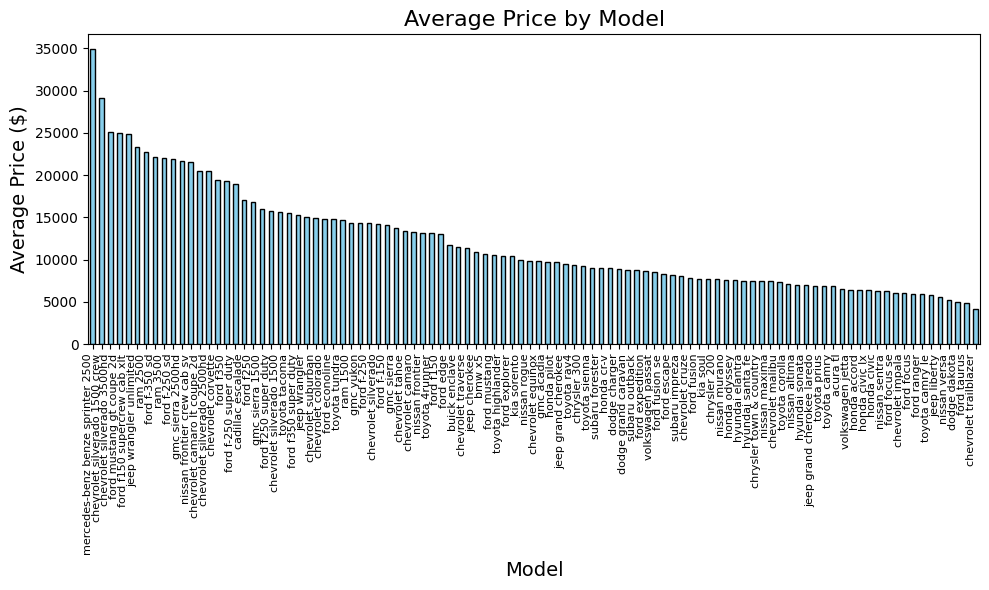

In [110]:
#checking average price by model
average_price_by_model = df.groupby('model')['price'].mean()

#displaying the average price by model
plt.figure(figsize=(10, 6))
average_price_by_model.sort_values(ascending=False).plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Price by Model', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Average Price ($)', fontsize=14)
plt.xticks(rotation=90, ha='right', fontsize=8)
plt.tight_layout()
plt.show()

<Axes: title={'center': 'Price Distribution'}, xlabel='Price', ylabel='Frequency'>

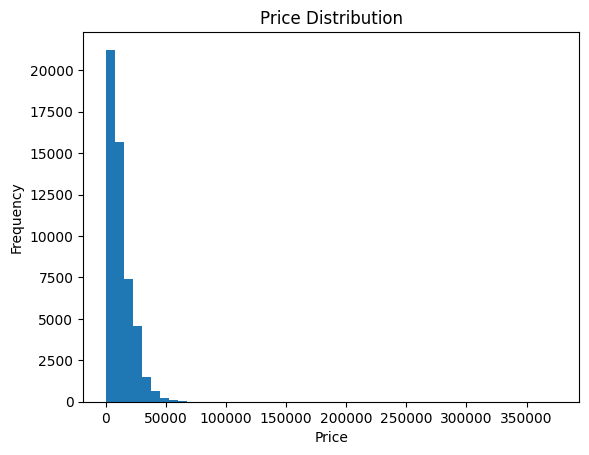

In [111]:
import matplotlib.pyplot as plt
# Plotting the distribution of the price
df['price'].plot(kind='hist', bins=50, title='Price Distribution', xlabel='Price', ylabel='Frequency')


<Axes: title={'center': 'Model Year Distribution'}, xlabel='model_year'>

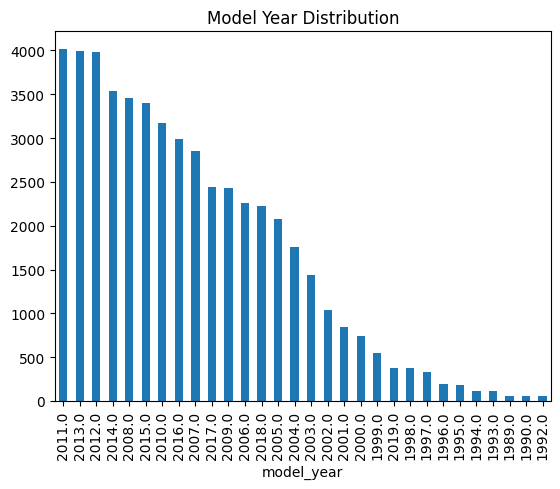

In [ ]:
# Plotting the distribution of the model year
df['model_year'].value_counts().head(30).plot(kind='bar', title='Model Year Distribution')


We can establish that most cars in this dataset are from 2010 to 2018. Very limited amount of cars prior to 2000.

<Axes: title={'center': 'Condition Breakdown'}, xlabel='condition'>

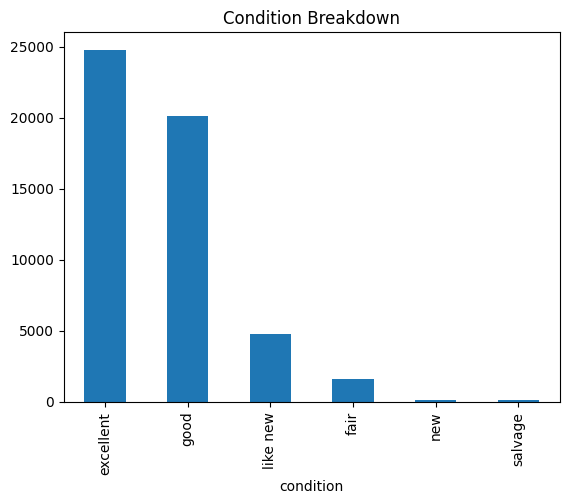

In [ ]:
# Plotting the distribution of condition
df['condition'].value_counts().plot(kind='bar', title='Condition Breakdown')


New cars are some of the least common vehicles in the dataset, but they are also the most expensive. Most common car in dataset is in excellent condition. 

<Axes: title={'center': 'Paint Color Distribution'}, xlabel='paint_color'>

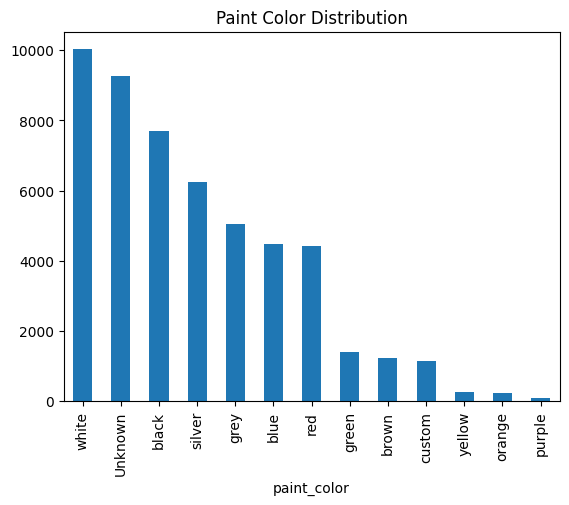

In [114]:
# Plotting the distribution of paint colors
df['paint_color'].value_counts().plot(kind='bar', title='Paint Color Distribution')


White cars are the most common in the dataset provided. Black, Silver, grey, blue and red are fairly common while all additional colors could be considered rare or unique.

<Axes: title={'center': 'Price vs Odometer'}, xlabel='odometer', ylabel='price'>

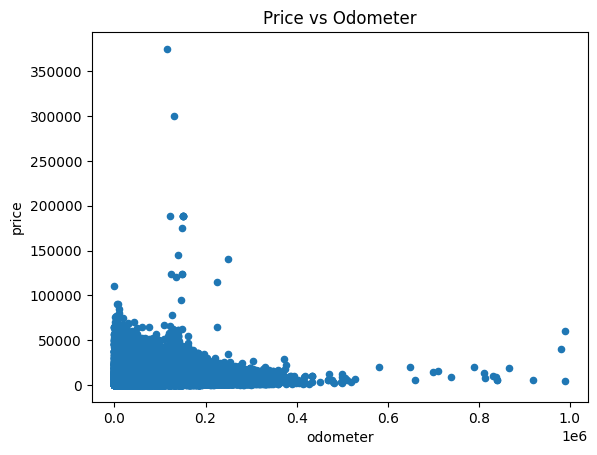

In [115]:
# Convert columns to numeric, coercing errors to NaN
df['odometer'] = pd.to_numeric(df['odometer'], errors='coerce')
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Drop rows with NaN
df = df.dropna(subset=['odometer', 'price'])

# Plot
df.plot.scatter(x='odometer', y='price', title='Price vs Odometer')


<Axes: title={'center': 'Average Price by Condition'}, xlabel='condition', ylabel='Average price'>

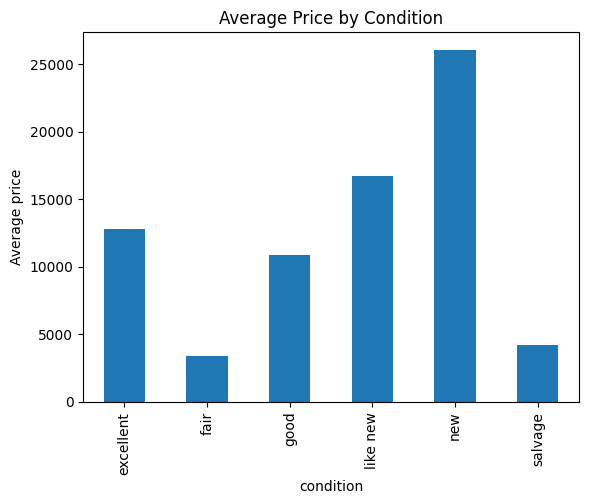

In [ ]:
# Plot
df.groupby('condition')['price'].mean().plot(kind='bar', ylabel='Average price', title='Average Price by Condition')


New cars hae the highest average price based on the condition. Like new sees a significant decrease in pricing with little decreases in overall condition.

<Axes: title={'center': 'Average Price by Fuel Type'}, xlabel='fuel'>

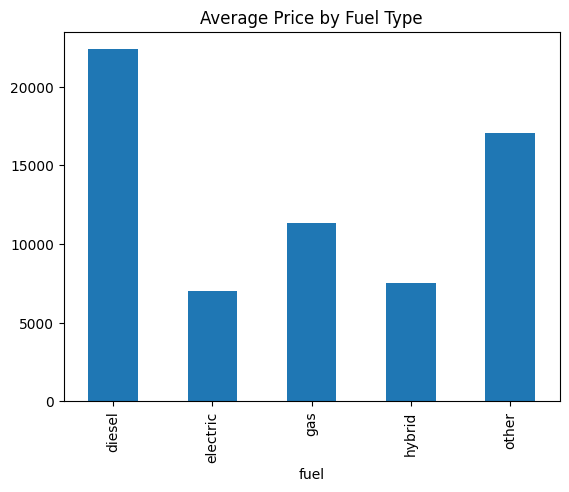

In [117]:
# Plot
df.groupby('fuel')['price'].mean().plot(kind='bar', title='Average Price by Fuel Type')


Disel car's take up a majority of the data provided followed by 'other' and gas. Electric and hybrid are even in their market share.

<Axes: title={'center': 'Paint Color by Type'}, xlabel='paint_color'>

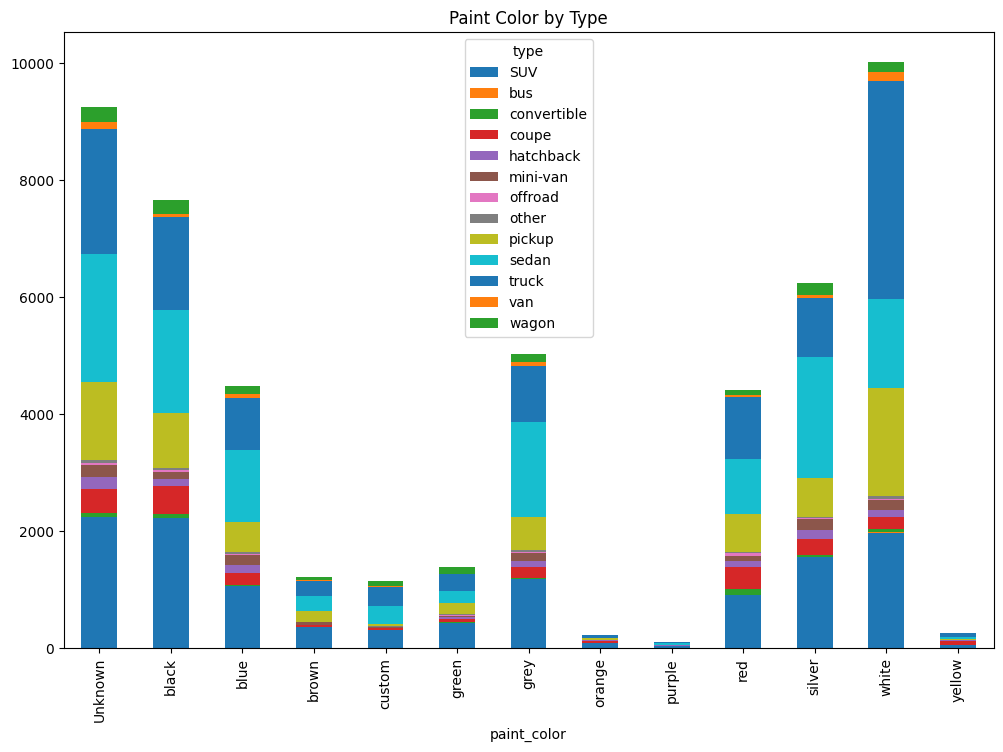

In [118]:
# Plot
pd.crosstab(df['paint_color'], df['type']).plot(kind='bar', stacked=True, title='Paint Color by Type', figsize=(12, 8))


SUV's trucks and pickups are the most common types of vehicles in the all the colors, with smaller vehicles procuring must less capital. 

<Axes: title={'center': 'Average Price by Month'}, xlabel='date_posted'>

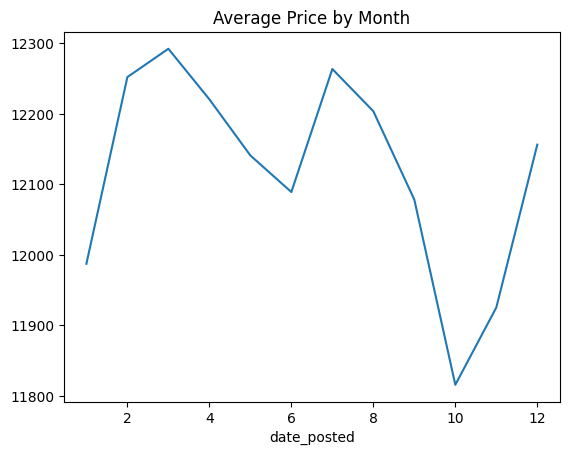

In [ ]:
# Convert date_posted to datetime
df['date_posted'] = pd.to_datetime(df['date_posted'])
# Plot
df.groupby(df['date_posted'].dt.month)['price'].mean().plot(title='Average Price by Month')



We can see a significant decrease in price for cars posted for 10 months. As we are unsure of the condition we can't make any immediate conclusions as to if that's the best car to purchase.

### **Conclusion on the Dataset Analysis**

The data reveals several notable trends in the automotive market:

1. **Pricing Trends**:  
   Cars posted for 10 months show a significant decrease in price. However, due to the lack of information on the condition of these vehicles, it is challenging to determine if they represent the best value for purchase. Further investigation into condition-related attributes is necessary for a more conclusive analysis.

2. **Vehicle Types**:  
   SUVs, trucks, and pickups dominate the dataset across all paint colors, reflecting their popularity and demand. In contrast, smaller vehicles tend to generate significantly less capital, suggesting a lower market value or demand.

3. **Fuel Types**:  
   Diesel cars account for the majority of the vehicles in the dataset, followed by "other" fuel types and gasoline-powered cars. Electric and hybrid vehicles have an equal but minimal market share, indicating a limited presence in this dataset.

4. **Condition vs. Price**:  
   New cars command the highest average price, as expected. Vehicles in "like new" condition experience a notable price drop, with further decreases as condition worsens. This demonstrates a steep depreciation curve tied to condition, even for vehicles with minimal wear.

5. **Paint Colors**:  
   White is the most common paint color in the dataset, followed by black, silver, grey, blue, and red. These are standard, widely available colors. Conversely, less conventional colors—such as purple, orange, yellow, and green—are rare, potentially making vehicles with these colors more unique or niche in appeal.

---

### **Final Thoughts**
This analysis highlights key trends in vehicle pricing, types, fuel preferences, and aesthetic choices. For buyers, SUVs and pickups dominate availability, while smaller cars may offer more affordable options. Paint color, fuel type, and condition are critical factors influencing price and buyer preference. Future analysis could focus on combining these factors with vehicle odometer readings to better understand value-for-money considerations.

